# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sisimiut
Processing Record 2 of Set 1 | tranovaho
City not found. Skipping... 'coord'
Processing Record 3 of Set 1 | coronel suarez
Processing Record 4 of Set 1 | boa vista
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | chinde
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | batalha
Processing Record 20 of Set 1 | recani
Processing Record 21 of Set 1 | adamstown
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sisimiut,66.9395,-53.6735,-22.22,92,100,1.48,GL,1738804537
1,coronel suarez,-37.4547,-61.9334,16.64,93,12,2.75,AR,1738804539
2,boa vista,2.8197,-60.6733,28.99,65,75,5.14,BR,1738804488
3,grytviken,-54.2811,-36.5092,1.78,95,100,3.82,GS,1738804541
4,port-aux-francais,-49.3500,70.2167,7.42,94,100,9.41,TF,1738804542


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-22.22,92,100,1.48,GL,1738804537
1,coronel suarez,-37.4547,-61.9334,16.64,93,12,2.75,AR,1738804539
2,boa vista,2.8197,-60.6733,28.99,65,75,5.14,BR,1738804488
3,grytviken,-54.2811,-36.5092,1.78,95,100,3.82,GS,1738804541
4,port-aux-francais,-49.3500,70.2167,7.42,94,100,9.41,TF,1738804542


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

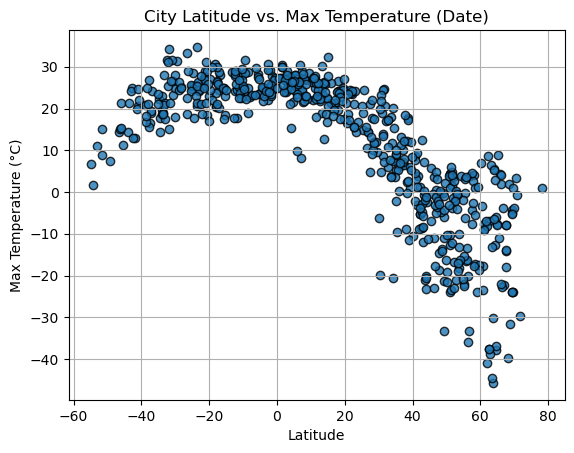

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

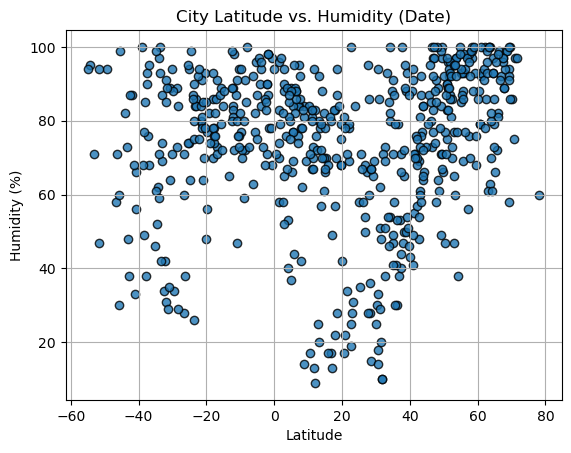

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

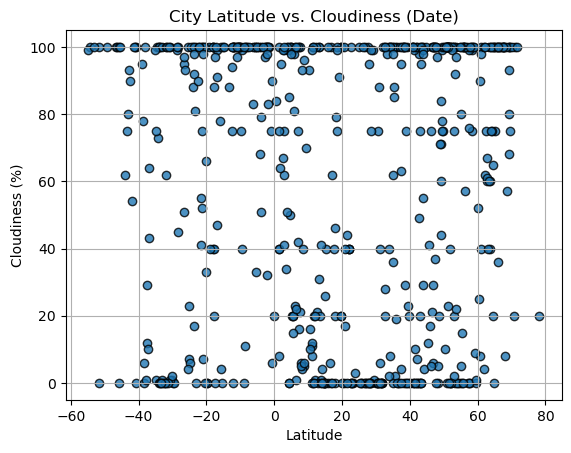

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

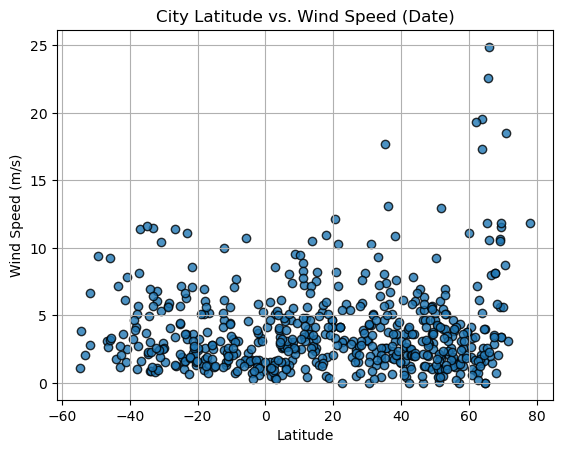

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, file_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

    # Save and show plot
    plt.savefig(file_name)
    plt.show()

    print(f"R-squared: {rvalue**2:.3f}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-22.22,92,100,1.48,GL,1738804537
2,boa vista,2.8197,-60.6733,28.99,65,75,5.14,BR,1738804488
5,tura,25.5198,90.2201,14.97,71,0,1.90,IN,1738804543
6,chinde,26.8212,87.7095,14.43,68,0,2.42,NP,1738804545
7,ribeira grande,38.5167,-28.7000,17.65,95,29,7.60,PT,1738804546


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coronel suarez,-37.4547,-61.9334,16.64,93,12,2.75,AR,1738804539
3,grytviken,-54.2811,-36.5092,1.78,95,100,3.82,GS,1738804541
4,port-aux-francais,-49.3500,70.2167,7.42,94,100,9.41,TF,1738804542
8,waitangi,-43.9535,-176.5597,14.34,82,62,1.79,NZ,1738804547
9,avarua,-21.2078,-159.7750,29.03,79,100,3.60,CK,1738804548


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.69


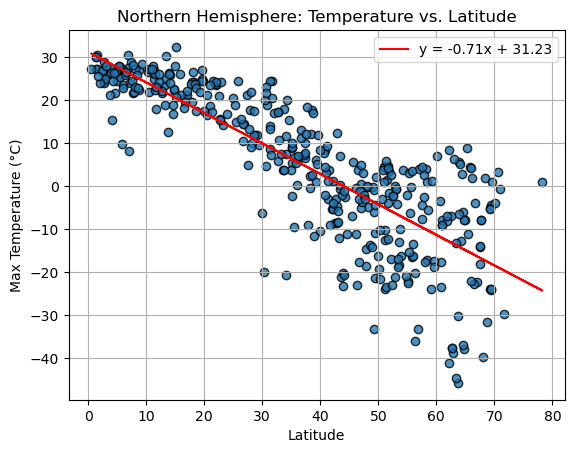

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.28


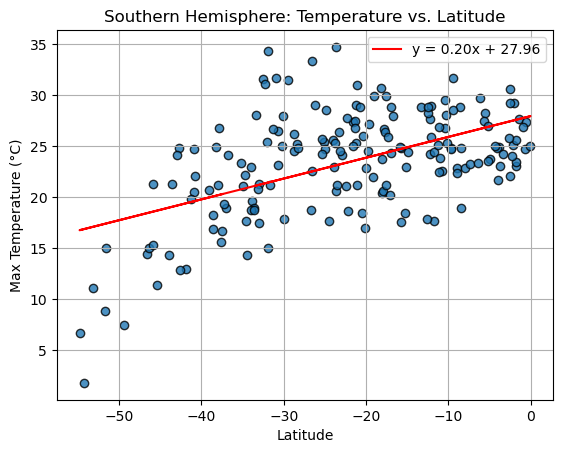

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.11


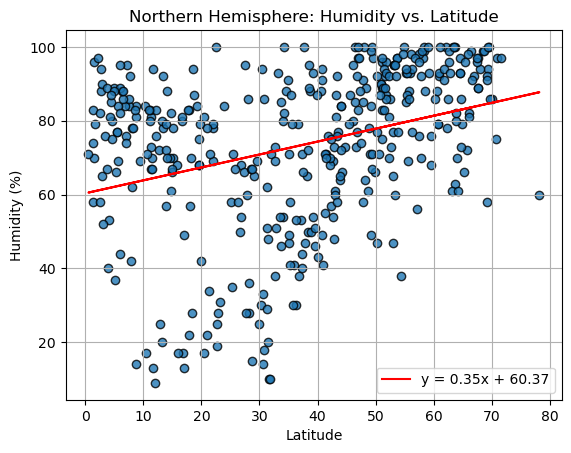

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.08


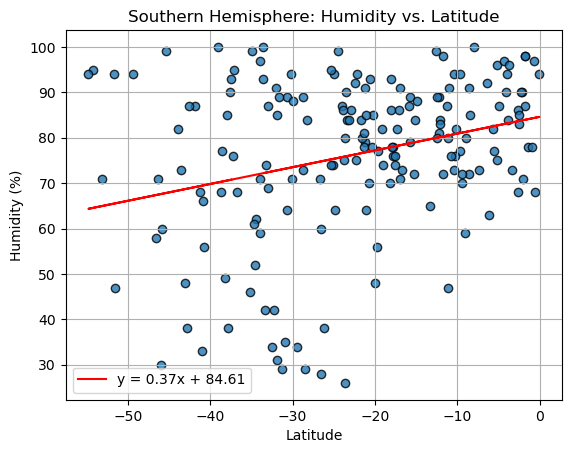

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04


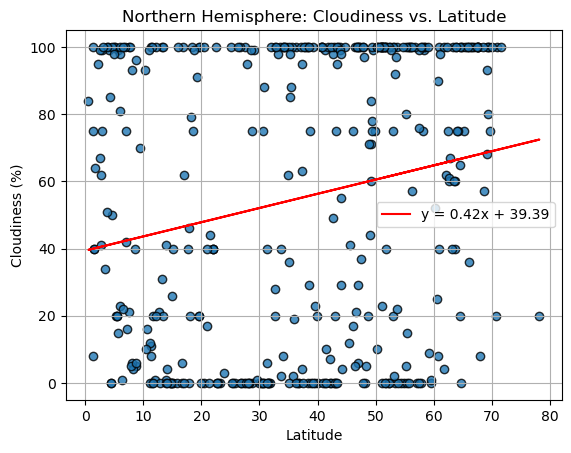

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.03


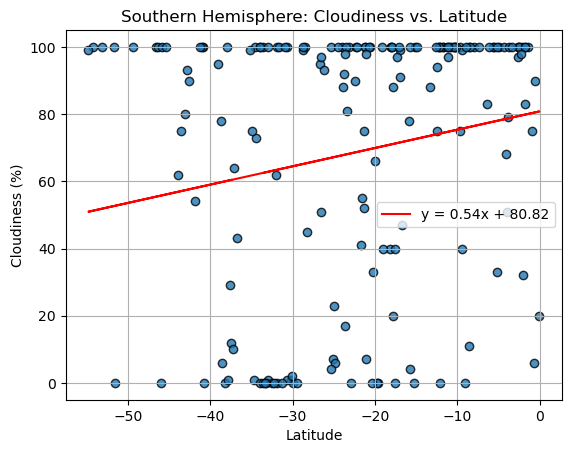

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01


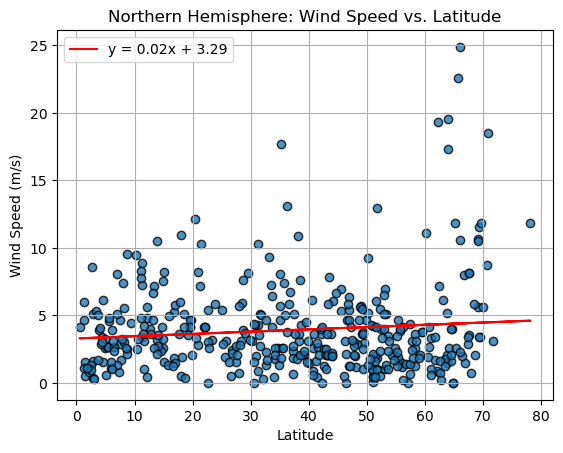

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.05


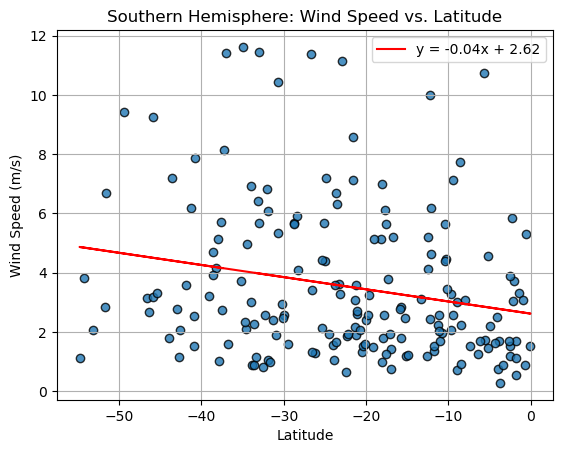

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [27]:
print("The biggest correlation I see in the linear regression lies in the Temperature vs Laditude section. .This is highly showcased in how the temerature signficantly drops the higher the Laditude is.")


The biggest correlation I see in the linear regression lies in the Temperature vs Laditude section. .This is highly showcased in how the temerature signficantly drops the higher the Laditude is.
